In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from kmodes.kmodes import KModes
%matplotlib inline

In [4]:
df = pd.read_csv('/Volumes/thesis-data/main.csv', nrows=10)

In [15]:
df.iloc[:, [250, 251, 252, 253, 254, 255, 256, 257, 258]]

,consultant,end_ward,pasid,practice_code,procedure_code,procedure_date_dt,site1,south_north,start_ward
0,BOLJM,80644,M0109110,W95086,U051,29/09/2013,PCH,North,80644
1,DEWRI,63314,M2517965,W95006,999,NaN,RGH,South,63314
2,PEMJM,63309,M1032814,W95025,T439,05/02/2014,RGH,South,63309
3,EVAPM,63304,M2094448,W95058,U051,28/10/2013,RGH,South,63304
4,ELHAS,63317,M2198081,W95027,999,NaN,RGH,South,63317
5,ELHAS,63318,M2603928,W95062,999,NaN,RGH,South,63318
6,SINAB,80617,M0024454,W95016,M459,24/10/2013,PCH,North,80617
7,OKUOH,80631,M0312035,W95005,999,NaN,PCH,North,80631
8,CONKP,80644,M0005885,W95016,999,NaN,PCH,North,80644
9,WOOA,63301,M2067703,W95071,999,NaN,RGH,South,63301


In [16]:
%%time
df = pd.read_csv('/Volumes/thesis-data/main.csv',
                 parse_dates=['Bench_Period', 'ADMDATE', 
                              'DISCDATE', 'EPISODE_ST', 'EPISODE_END', 
                              'procedure_date_dt'],
                 dtype={'ADM_MET': 'object', 'DIS_MET': 'object', 
                        'MAIN_SPEC': 'object', 'NON_NHS_FLAG': 'object', 
                        'OPCS_12': 'object', 'OPCS_13': 'object', 
                        'DayofMainProc': 'object', 'SEX': 'object', 
                        'consultant': 'object', 'end_ward': 'object', 
                        'pasid': 'object', 'practice_code': 'object', 
                        'procedure_code': 'object', 'procedure_date_dt': 'object', 
                        'site1': 'object', 'south_north': 'object', 'start_ward': 'object'}
                )

# Categorical attributes only, and fill NaN with an empty string.
cat_df = df[[col for col in df.columns \
             if df[col].dtype == np.dtype('object') \
             and col not in ['PATIENT_ID', 'EPISODE_ID',
                             'pasid', 'SPELL_ID']]
           ].fillna('')

sample_df = cat_df.sample(n=100, random_state=0)

CPU times: user 3min 32s, sys: 16.9 s, total: 3min 49s
Wall time: 3min 52s


In [44]:
len(cat_df.columns)

68

In [42]:
%%time
huang_costs = []
for i in range(80, 100):
    km = KModes(n_clusters=i, init='huang', n_init=50)
    clusters = km.fit_predict(sample_df)
    huang_costs.append(km.cost_)
    
cao_costs = []
for i in range(80, 100):
    km = KModes(n_clusters=i, init='cao', n_init=50)
    clusters = km.fit_predict(sample_df)
    cao_costs.append(km.cost_)

random_costs = []
for i in range(80, 100):
    km = KModes(n_clusters=i, init='random', n_init=50)
    clusters = km.fit_predict(sample_df)
    random_costs.append(km.cost_)

CPU times: user 36min 9s, sys: 8.08 s, total: 36min 18s
Wall time: 36min 17s


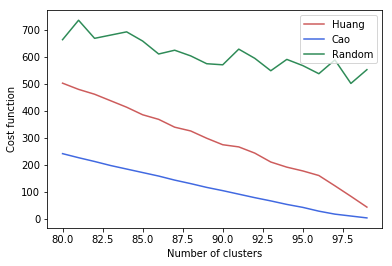

In [43]:
plt.figure()
plt.plot(range(80, 100), huang_costs, color='indianred', label='Huang')
plt.plot(range(80, 100), cao_costs, color='royalblue', label='Cao')
plt.plot(range(80, 100), random_costs, color='seagreen', label='Random')
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.legend(loc='upper right');